<div style="text-align: left; background-color:black; font-family: Trebuchet MS; color:#A60505; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: black solid;"> Pet Facial Expression </div>

<center>
    <img src='https://dogexpress.in/wp-content/uploads/2017/07/Dogs-With-Funny-Facial-Expressions-1-660x330.jpg'>
</center>

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

## <div style="background-color:#B21010;font-family:sans-serif;color:#FFF9ED;font-size:150%;text-align:center;border-radius:9px 9px; padding: 15px; border-style: solid; border-color: black">TABLE OF CONTENTS</div>   
    
* [1. Introduction](#1)
    
* [2. Import Necessaries](#2)
    
* [3. EDA](#3)

    * [3.1. Define data path and dataset name](#3.1)
    * [3.2. Create Dataframe for the dataset](#3.2)
    * [3.3. Display Number of Examples in the dataset](#3.3)
    * [3.4. Display Number of Classes in the dataset](#3.4)
    * [3.5. Display count of images in each class of the dataset](#3.5)
    * [3.6. Visualize Each Class in the dataset](#3.6)
    * [3.7. Check Null values in the dataframe](#3.7)
    * [3.8. Visualize Null values](#3.8)
    
    
* [4. Split dataframe into train, valid, and test](#4)
     
* [5. Create Image Data Generator](#5)

* [6. Visualize Training dataset](#6)

* [7. Model Structure](#7)

    * [7.1. Generic Model Creation](#7.1)
    * [7.2. Define Early Stop](#7.2)
    * [7.3. Train model](#7.3)
    

* [8. Evaluate Model](#8)

    * [8.1. Plot accuarcy and loss curve](#8.1)
    * [8.2. Model Accuarcy](#8.2)
    * [8.3. Get Predictions](#8.3)
    

* [9. Save the Model](#9)

* [10. Load Model ](#10)

* [11. AUTHOR MESSAGE](#11)



<a id="1"></a>
## <b>1 <span style='color:#B21010'>||</span> Introduction</b>


<div style="border-radius:10px;
            border: black solid;
            adding: 15px;
            background-color:#FBA7A7;
            font-size:120%;
            text-aling: left">
<h3 style:'border:0; border-radius: 15px; color: black'><center> Steps we will go through:</center></h3>

_________________________________________________________________________
    
Imagine a world where machines effortlessly identify cars, trucks, motorcycles, and more, solely through images. That's precisely what we're setting out to achieve. The implications are immense – from urban planning to autonomous driving, our journey into image classification holds transformative power.

Let's dive in and harness the magic of deep learning to crack the code of vehicle type recognition
    
we will walk through this steps:
    
1. Load the data by storing each image path in a list and its corresponding label in another list<br>
2. Transform the lists into dataframe<br>
3. EDA and analyze the data for more insights
4. Split the data into train, test and validation datasets<br>
5. Create Data Generator for Train, Test and validation datasets<br>
Tensorflow Generators are very useful to Generate batches of tensor image data with real-time data augmentation.<br>
6. Load the pretrained model, add some layers on top of its base layer and compile it<br>
We will be using EffiecentNet, of course you can use any pretrained model you want and tune its architecture and parameters!<br>
7. Evaluate the model by plotting acc and loss curves, plot confussion matrix and print classification report<br>
8. Save the model to use it in production<br>
9. Finally, Load the model and make predictions

<a id="2"></a>
## <b>2 <span style='color:#B21010'>||</span> Import Necessaries</b>

In [2]:
import os
import itertools

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

2023-11-24 12:10:45.820732: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


modules loaded


<a id="3"></a>
## <b>3 <span style='color:#B21010'>||</span> EDA</b>

<a id="3.1"></a>
### <b>3.1 <span style='color:#B21010'>||</span> Define data path and dataset name</b>

In [3]:
train_data_dir = 'pets_facial_expression_dataset/master/train'
valid_data_dir = 'pets_facial_expression_dataset/master/valid'
test_data_dir = 'pets_facial_expression_dataset/master/test'

data_dir = 'pets_facial_expression_dataset'


ds_name = 'Pets Facial Expression'

<a id="3.2"></a>
### <b>3.2 <span style='color:#B21010'>||</span> Create Dataframe for the dataset</b>

In [4]:
# Generate data paths with labels

def generate_data_paths(data_dir):
    
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)
    for fold in folds:
        if fold == 'master':
            continue
            
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            labels.append(fold)
            
    return filepaths, labels


filepaths, labels = generate_data_paths(data_dir)

In [5]:
def create_df(filepaths, labels):

    Fseries = pd.Series(filepaths, name= 'filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis= 1)
    return df

df = create_df(filepaths, labels)

In [6]:
df.head()

,filepaths,labels
0,pets_facial_expression_dataset/happy/aug-70-08...,happy
1,pets_facial_expression_dataset/happy/aug-121-0...,happy
2,pets_facial_expression_dataset/happy/aug-78-09...,happy
3,pets_facial_expression_dataset/happy/aug-68-08...,happy
4,pets_facial_expression_dataset/happy/aug-8-012...,happy


<a id="3.3"></a>
### <b>3.3 <span style='color:#B21010'>||</span> Display Number of Examples in the dataset</b>

In [7]:
def num_of_examples(df, name='df'):
    print(f"The {name} dataset has {df.shape[0]} images.")
    
num_of_examples(df, ds_name)

The Pets Facial Expression dataset has 1000 images.


<a id="3.4"></a>
### <b>3.4 <span style='color:#B21010'>||</span> Display Number of Classes in the dataset</b>

In [8]:
def num_of_classes(df, name='df'):
    print(f"The {name} dataset has {len(df['labels'].unique())} classes")
    
num_of_classes(df, ds_name)

The Pets Facial Expression dataset has 4 classes


<a id="3.5"></a>
### <b>3.5 <span style='color:#B21010'>||</span> Display count of images in each class of the dataset</b>

In [9]:
def classes_count(df, name='df'):
    
    print(f"The {name} dataset has: ")
    print("="*70)
    print()
    for name in df['labels'].unique():
        num_class = len(df['labels'][df['labels'] == name])
        print(f"Class '{name}' has {num_class} images")
        print('-'*70)
        
classes_count(df, ds_name)

The Pets Facial Expression dataset has: 

Class 'happy' has 250 images
----------------------------------------------------------------------
Class 'Sad' has 250 images
----------------------------------------------------------------------
Class 'Other' has 250 images
----------------------------------------------------------------------
Class 'Angry' has 250 images
----------------------------------------------------------------------


<a id="3.6"></a>
### <b>3.6 <span style='color:#B21010'>||</span> Visualize Each Class in the dataset</b>

In [10]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)
    
    
colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

cat_summary_with_graph(df,'labels')

<a id="3.7"></a>
### <b>3.7 <span style='color:#B21010'>||</span> Check Null values in the dataframe</b>

In [11]:
def check_null_values(df, name='df'):
    
    num_null_vals = sum(df.isnull().sum().values)
    
    if not num_null_vals:
        print(f"The {name} dataset has no null values")
    
    else:
        print(f"The {name} dataset has {num_null_vals} null values")
        print('-'*70)
        print('Total null values in each column:\n')
        print(df.isnull().sum())
        

check_null_values(df, ds_name)

The Pets Facial Expression dataset has no null values


<a id="3.8"></a>
### <b>3.8 <span style='color:#B21010'>||</span> Visualize Null values</b>

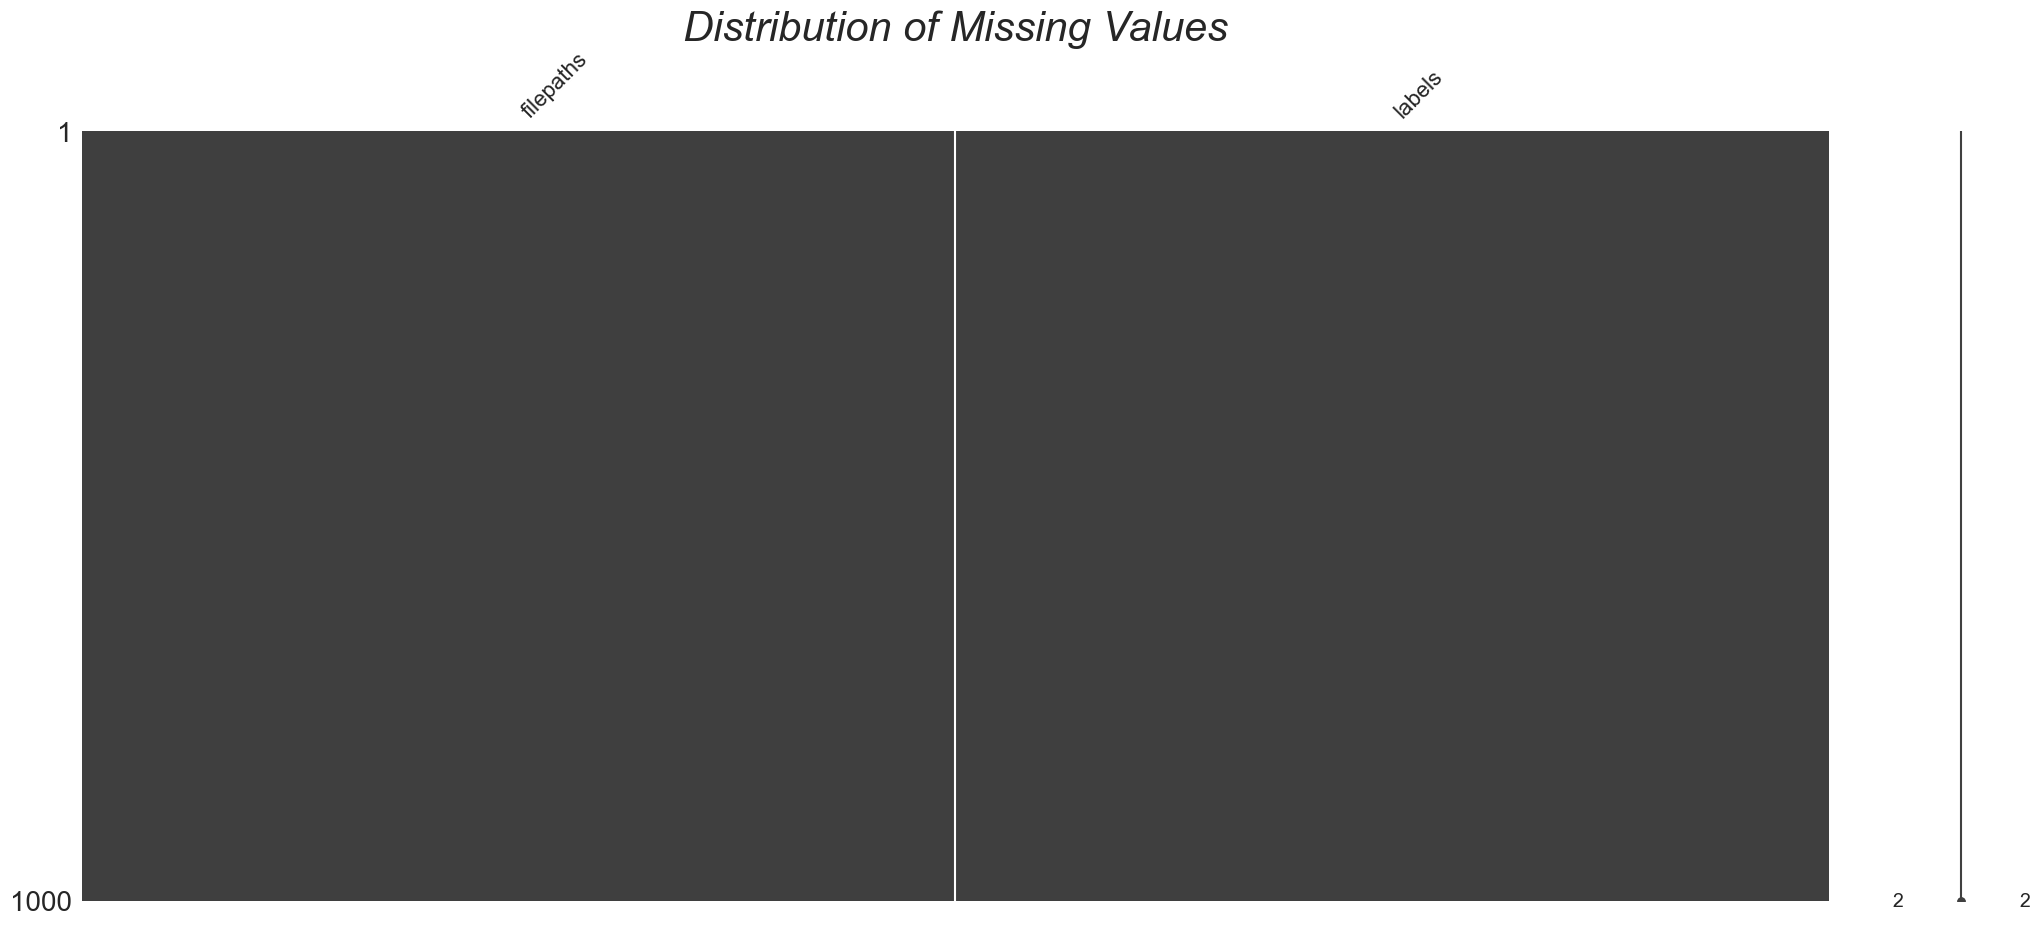

In [12]:
msno.matrix(df)
plt.title('Distribution of Missing Values', fontsize=30, fontstyle='oblique');

<a id="4"></a>
## <b>4 <span style='color:#B21010'>||</span>Split dataframe into train, valid, and test</b>

In [13]:

# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.6, shuffle= True, random_state= 123)


In [ ]:
'''
filepaths, labels = generate_data_paths(train_data_dir)
train_df = create_df(filepaths, labels)

filepaths, labels = generate_data_paths(valid_data_dir)
valid_df = create_df(filepaths, labels)

filepaths, labels = generate_data_paths(test_data_dir)
test_df = create_df(filepaths, labels)
'''

In [14]:
num_of_examples(train_df, "Training "+ds_name)
num_of_examples(valid_df, "Validation "+ds_name)
num_of_examples(test_df, "Testing "+ds_name)

The Training Pets Facial Expression dataset has 800 images.
The Validation Pets Facial Expression dataset has 120 images.
The Testing Pets Facial Expression dataset has 80 images.


In [15]:
num_of_classes(train_df, "Training "+ds_name)
num_of_classes(valid_df, "Validation "+ds_name)
num_of_classes(test_df, "Testing "+ds_name)

The Training Pets Facial Expression dataset has 4 classes
The Validation Pets Facial Expression dataset has 4 classes
The Testing Pets Facial Expression dataset has 4 classes


In [16]:
classes_count(train_df, 'Training '+ds_name)

The Training Pets Facial Expression dataset has: 

Class 'Other' has 209 images
----------------------------------------------------------------------
Class 'Angry' has 192 images
----------------------------------------------------------------------
Class 'Sad' has 201 images
----------------------------------------------------------------------
Class 'happy' has 198 images
----------------------------------------------------------------------


In [17]:
classes_count(valid_df, 'Validation '+ds_name)

The Validation Pets Facial Expression dataset has: 

Class 'Sad' has 29 images
----------------------------------------------------------------------
Class 'Other' has 28 images
----------------------------------------------------------------------
Class 'happy' has 35 images
----------------------------------------------------------------------
Class 'Angry' has 28 images
----------------------------------------------------------------------


In [18]:
classes_count(test_df, 'Testing '+ds_name)

The Testing Pets Facial Expression dataset has: 

Class 'happy' has 17 images
----------------------------------------------------------------------
Class 'Sad' has 20 images
----------------------------------------------------------------------
Class 'Angry' has 30 images
----------------------------------------------------------------------
Class 'Other' has 13 images
----------------------------------------------------------------------


<a id="5"></a>
## <b>5 <span style='color:#B21010'>||</span>Create Image Data Generator</b>

In [19]:
# crobed image size
batch_size = 16
img_size = (128, 128)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           brightness_range=[0.4,0.6],
                           zoom_range=0.3,
                           horizontal_flip=True,
                           vertical_flip=True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           brightness_range=[0.4,0.6],
                           zoom_range=0.3,
                           horizontal_flip=True,
                           vertical_flip=True)

train_gen = tr_gen.flow_from_dataframe(train_df, 
                                       x_col= 'filepaths', 
                                       y_col= 'labels', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= 'rgb', 
                                       shuffle= True, 
                                       batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe(valid_df, 
                                       x_col= 'filepaths', 
                                       y_col= 'labels', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= 'rgb', 
                                       shuffle= True, 
                                       batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe(test_df, 
                                      x_col= 'filepaths', 
                                      y_col= 'labels', 
                                      target_size= img_size, 
                                      class_mode= 'categorical',
                                      color_mode= 'rgb', 
                                      shuffle= False, 
                                      batch_size= test_batch_size)

Found 800 validated image filenames belonging to 4 classes.
Found 120 validated image filenames belonging to 4 classes.
Found 80 validated image filenames belonging to 4 classes.


<a id="6"></a>
## <b>6 <span style='color:#B21010'>||</span>Visualize Training dataset</b>

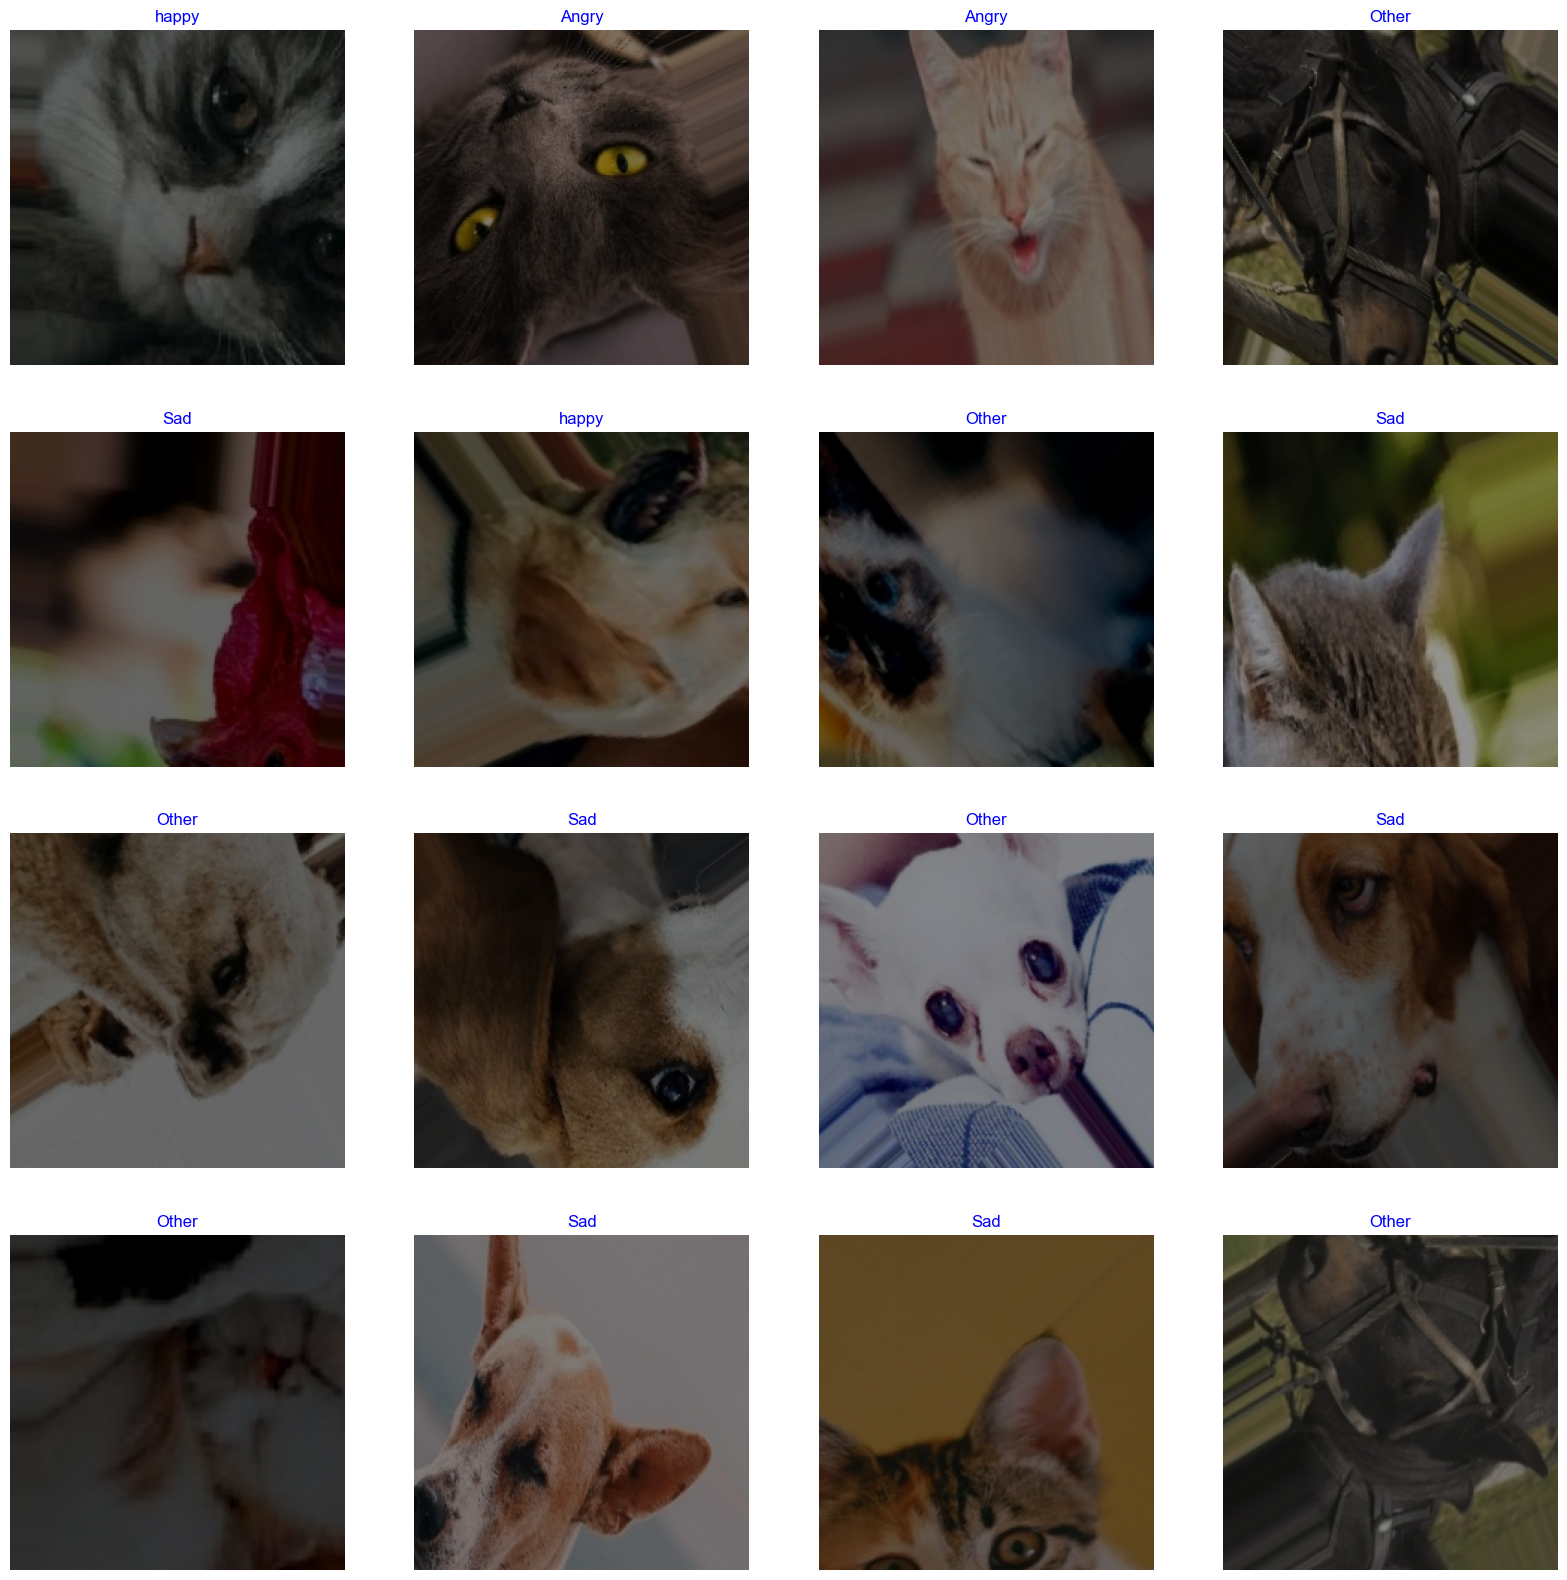

In [20]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
    
plt.show()

<a id="7"></a>
## <b>7 <span style='color:#B21010'>||</span>Model Structure</b>

<a id="7.1"></a>
### <b>7.1 <span style='color:#B21010'>||</span>Generic Model Creation</b>

In [21]:
# Create Model Structure
img_size = (128, 128)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB5(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
base_model.trainable = False

# integrate with pre-trained species classification model with imgae size (128, 128) with RGB channels
pretrained_animal_classifier = load_model("animal_classifier_model.h5")
# Freeze the layers of the pre-trained model
for layer in pretrained_animal_classifier.layers:
    layer.trainable = False


model = Sequential([
    # add the species classifier
    pretrained_animal_classifier,
    # the original model
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, activation='relu'),
    Dense(128, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

115263384/115263384 [==============================] - 7s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional  (None, 2048)              28513527  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                       

<a id="7.2"></a>
### <b>7.2 <span style='color:#B21010'>||</span>Define Early Stop</b>

In [22]:
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=5, 
                               restore_best_weights=True,
                               mode='max',
                              )

def step_decay(epoch):
    
     initial_lrate = 0.1
     drop = 0.5
     epochs_drop = 10.0
     lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
     return lrate

lr_scheduler = LearningRateScheduler(step_decay)

<a id="7.3"></a>
### <b>7.3 <span style='color:#B21010'>||</span>Train Model</b>

In [23]:
batch_size = 16   # set batch size for training
epochs = 100   # number of all epochs in training

history = model.fit(x=train_gen,
                    epochs= epochs,
                    verbose= 1,
                    validation_data= valid_gen, 
                    validation_steps= None,
                    shuffle= False)

Epoch 1/100
50/50 [==============================] - 126s 2s/step - loss: 4.4424 - accuracy: 0.3800 - val_loss: 4.3822 - val_accuracy: 0.4417
Epoch 2/100
50/50 [==============================] - 103s 2s/step - loss: 3.8129 - accuracy: 0.5063 - val_loss: 3.7408 - val_accuracy: 0.5000
Epoch 3/100
50/50 [==============================] - 101s 2s/step - loss: 3.5653 - accuracy: 0.5163 - val_loss: 3.4961 - val_accuracy: 0.5667
Epoch 4/100
17/50 [=========>....................] - ETA: 59s - loss: 3.3053 - accuracy: 0.6029 

<a id="8"></a>
## <b>8 <span style='color:#B21010'>||</span>Evaluate Model</b>

<a id="8.1"></a>
### <b>8.1 <span style='color:#B21010'>||</span>Plot accuarcy and loss curve </b>

In [ ]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

<a id="8.2"></a>
### <b>8.2 <span style='color:#B21010'>||</span>Model Accuarcy</b>

In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

<a id="8.3"></a>
### <b>8.3 <span style='color:#B21010'>||</span>Get Prediction</b>

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

<a id="8.4"></a>
### <b>8.4 <span style='color:#B21010'>||</span>Confussion Matrix</b>

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

<a id="8.5"></a>
### <b>8.5 <span style='color:#B21010'>||</span>Classification Report</b>

In [ ]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

<a id="9"></a>
## <b>9 <span style='color:#B21010'>||</span>Save the Model</b>

In [ ]:
model.save_weights('my_model_weights.h5')

<a id="10"></a>
## <b>10 <span style='color:#B21010'>||</span>Load the model and Predict the Inputs</b>

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

def predict_and_display(image_path, model):
    
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    
    class_indices = train_gen.class_indices
    class_labels = list(class_indices.keys())
    predicted_class_label = class_labels[predicted_class_index]
    
    plt.imshow(img)
    plt.axis('off')
    if predicted_class_label == 'Other':
        plt.title(f"The pet is normal")
    else:
        plt.title(f"The Pet is {predicted_class_label}")
    plt.show()

model.load_weights('/kaggle/working/my_model_weights.h5')

class_labels = ['Angry', 'Other', 'Sad', 'Happy']

# Replace 'path_to_test_image' with the path to the image you want to test
image_path_to_test = '/kaggle/input/pets-facial-expression-dataset/Angry/02.jpg'
predict_and_display(image_path_to_test, model)

In [ ]:
image_path_to_test = '/kaggle/input/pets-facial-expression-dataset/Sad/031.jpg'
predict_and_display(image_path_to_test, model)

In [ ]:
image_path_to_test = '/kaggle/input/pets-facial-expression-dataset/happy/032.jpg'
predict_and_display(image_path_to_test, model)

In [ ]:
image_path_to_test = '/kaggle/input/pets-facial-expression-dataset/Other/20.jpg'
predict_and_display(image_path_to_test, model)

<a id="11"></a>
## <b>11 <span style='color:#B21010'>||</span>Author Message</b>

<p style="background-color:#DEF5B9;font-family:newtimeroman;color:#1D3E06;font-size:130%;text-align:center;border-radius:20px 20px;"> If you liked this Notebook, please do upvote.<br> If you have any questions, feel free to comment!<br> If you have any advice for me I will be grateful to leave it to me in the comments!<br>✨Best Wishes✨</p>